## Introduction
The following is the implementation of keystroke dynamics based on the dataset described in the study Comparing anomaly-detection for keystroke dynamics.
The authors of the study proposed to collect keystroke dynamics datasets to measure the performance of different detectors; they collected data entered by 51 subjects while typing 400 passwords each, submitting the data collected by 14 different algorithms, which evaluated performance in terms of user detection.

The purpose of the study was to reliably identify impostors who steal the passwords of other users, based on different typing patterns.

Impostors who try to authenticate using compromised passwords would be identified and promptly blocked on the basis of the different keystroke dynamics that characterize them compared to genuine users.

Some of the features that are used to determine keystroke dynamics are as follows:

* Keydown-keydown: This is the time that elapses between the key presses of consecutive keys
* Keyup-keydown: This is the time that elapses between the release of one key and the press of the next
* Hold: This is the time that elapses between the press and release of each key

From the raw data, the sets of timing features are extracted, which will be fed to the user detection algorithms.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [2]:
pwd_data = pd.read_csv("https://www.cs.cmu.edu/~keystroke/DSL-StrongPasswordData.csv", header = 0)

In [3]:
pwd_data

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,8,46,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,...,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,8,47,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,...,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,8,48,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,...,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,8,49,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,...,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


In [4]:
pwd_data.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

In [5]:
pwd_data.shape

(20400, 34)

In [7]:
DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD]

In [11]:
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()

/var/folders/mg/t6vnkg3s1db3z4yhw2q97rxc0000gn/T/ipykernel_30950/3284734298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['subject'] = pwd_data['subject'].values


<AxesSubplot: title={'center': 'Average Keystroke Latency per Subject'}>

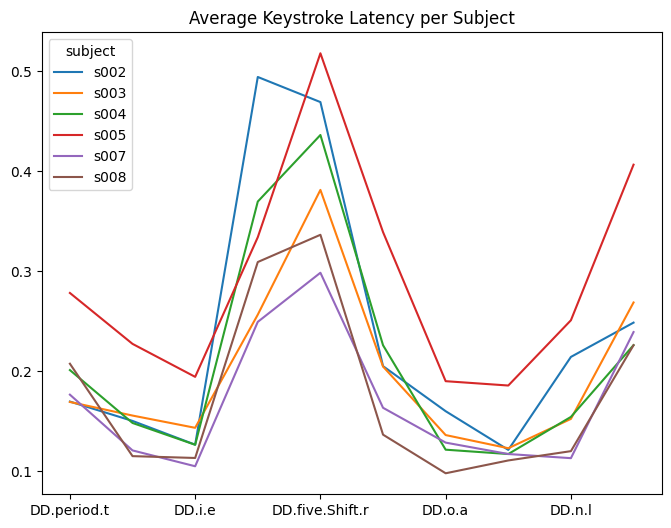

In [12]:
plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')


In [13]:
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)

X_train = data_train[pwd_data.columns[2:]]
y_train = data_train['subject']

X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

Classification using knn, SVM and Perceptron Classifier

In [14]:
# K-Nearest Neighbor Classifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.3730392156862745


/opt/homebrew/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
# Support Vector Linear Classifier
svc = svm.SVC(kernel='linear') 
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.7629901960784313


In [16]:
# Multi Layer Perceptron Classifier
mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)
mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.9068627450980392


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/var/folders/mg/t6vnkg3s1db3z4yhw2q97rxc0000gn/T/ipykernel_30950/2147631223.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([''] + labels)
/var/folders/mg/t6vnkg3s1db3z4yhw2q97rxc0000gn/T/ipykernel_30950/2147631223.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([''] + labels)


Text(0, 0.5, 'True')

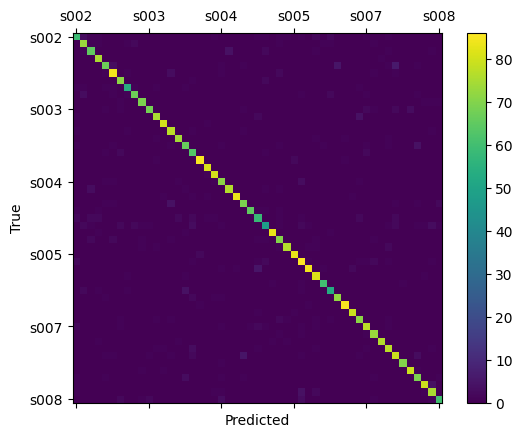

In [19]:
# Drawing confusion matrix for Multi Layer Perceptron results
from sklearn.metrics import confusion_matrix

labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred) 

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

## Sumary
In the preceding code , three different classifiers were used (available in the scikit-learn library), and their usage is shown in ascending order of prediction accuracy.

We start with the KNeighborsClassifier clustering algorithm, passing through the support vector machine linear classifier, up to the multilayer perceptron (MLP) classifier, which is the classifier that reports the highest degree of accuracy in predictions, accounting for over 90%.

The graphical representation of the average keystroke latency per subject and the confusion matrix of the results obtained using the multilayer perceptron classifier are also shown.